In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import torch
import torch.nn

In [2]:
import glob
uni = "date202205024_resam_run1"
# uni = "date20220512_real_run_cut"
# uni = "fuck"

path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]




path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/*"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/*"+uni +"_feature.csv"
feature_path = glob.glob(path)
feature_list = [file for file in feature_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/*"+uni +"_batch.csv"
batch_path = glob.glob(path)
batch_list = [file for file in batch_path if file.endswith(".csv")]




d = train_list
dd = pred_list
ddd = feature_list

ddddd = batch_list


In [3]:
dd

['/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205024_resam_run1/date202205024_resam_run1.csv']

In [4]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

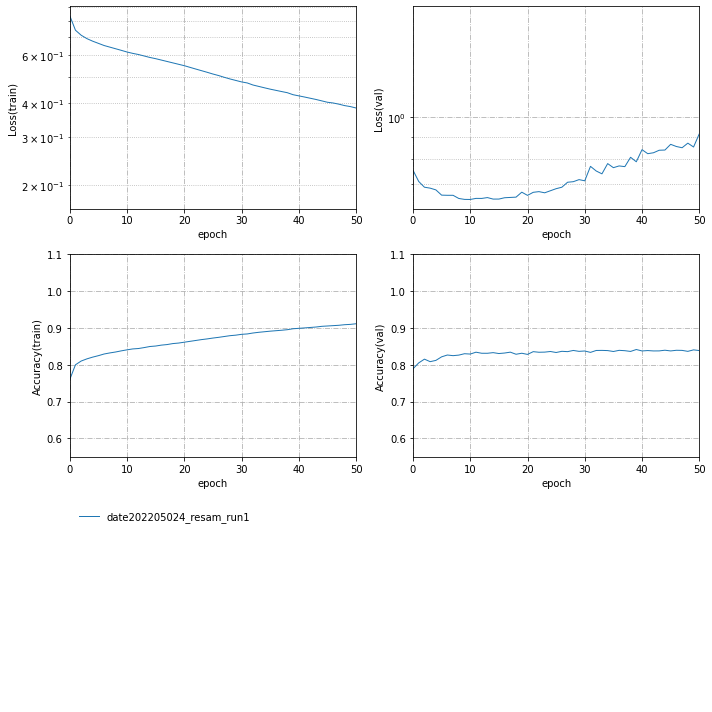

In [5]:
plt.rcParams['figure.figsize'] = (10, 10)
# plt.rcParams['figure.figsize'] = (10, 10)
ax1 = plt.subplot(3, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(3, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')
# ax1 = plt.subplot(3, 2, 1, ylabel='Loss(train)', xlabel='epoch')
# ax2 = plt.subplot(3, 2, 2, ylabel='Loss(val)', xlabel='epoch')
ax3 = plt.subplot(3, 2, 3, ylabel='Accuracy(train)', xlabel='epoch')
ax4 = plt.subplot(3, 2, 4, ylabel='Accuracy(val)', xlabel='epoch')
# ax1.set_ylim([0, 100])
# ax2.set_ylim([0, 100])
ax3.set_ylim([0.55,1.1])
ax4.set_ylim([0.55,1.1])
for ax in (ax1, ax2, ax3, ax4):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,50])
lines, labels = [], []

for i in range(len(d)):
    df = pd.read_csv(d[i])
    
    label = d[i].split('/')[-2].replace('__', ' ')
    if label.split('_')[0] == '210817':
        l =  ax1.plot(df['loss'], linewidth=2)
        ax2.plot(df['val_loss'], linewidth=2)
        ax3.plot(df['acc'], linewidth=2)
        ax4.plot(df['val_acc'], linewidth=2)
    else:
        l =  ax1.plot(df['loss'])
        ax2.plot(df['val_loss'])
        ax3.plot(df['acc'])
        ax4.plot(df['val_acc'])
    
    
    
    
#     label = ddd[i]
    
    
    
    
    lines.append(l[0])
    labels.append(label)
ax5 = plt.subplot(3,1,3)
ax5.legend(lines, labels)
# ax5.legend(lines, labels, bbox_to_anchor=(1.1, -4, 7, 7))
ax5.axis('off')
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.show()
plt.close()

In [6]:
df

,loss,acc,val_loss,val_acc
0,0.838714,0.759741,0.753383,0.789065
1,0.741354,0.800004,0.709293,0.805120
2,0.710615,0.810209,0.687892,0.815345
3,0.690591,0.816133,0.684473,0.808520
4,0.675914,0.820830,0.678126,0.811969
...,...,...,...,...
195,0.180350,0.964249,1.717578,0.800895
196,0.180209,0.964412,1.603334,0.805726
197,0.178600,0.964622,1.652641,0.803676
198,0.177753,0.964751,1.626730,0.807443


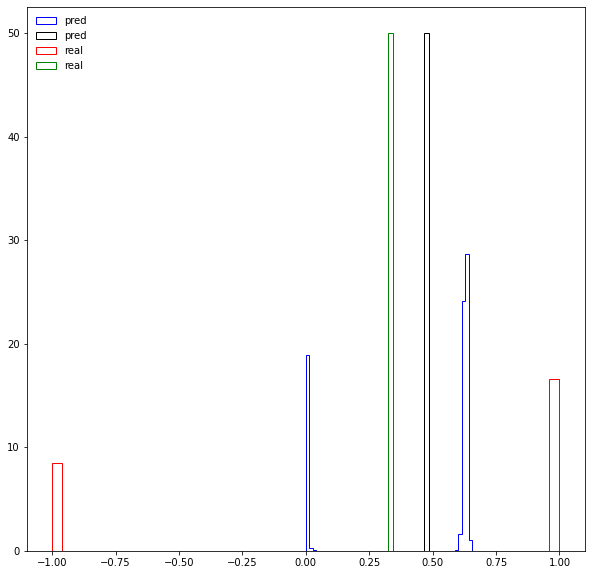

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score


#plt.yscale('log')
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
plt.hist(df['eval_resampling'][df['label']==1], histtype='step', 
             density=True, bins=50, color='blue',label='pred')   
plt.hist(np.average(df['eval_resampling'][df['label']==1]), histtype='step', 
             density=True, bins=50, color='black',label='pred')   
plt.hist((df['eval_real'])[df['label']==1], histtype='step', 
             density=True, bins=50, color='red',label='real') 
plt.hist(np.average(df['eval_real'][df['label']==1]), histtype='step', 
             density=True, bins=50, color='green',label='real') 
plt.legend()

plt.show()

In [23]:
np.average(df['eval_resampling'][df['label']==1])

0.4673654286714359

In [25]:
np.average(df['eval_resampling'][df['label']==1])/np.average(df['eval_real'][df['label']==1])

1.4402109263489127

In [10]:
# from sklearn.metrics import roc_curve, roc_auc_score


# #plt.yscale('log')
# plt.figure(figsize=(10,10))
# df = pd.read_csv(dd[0])
# plt.hist(df['prediction'], histtype='step', 
#              density=True, bins=50, color='blue',label='pred')        
# plt.hist(df['weight'], histtype='step', 
#              density=True, bins=50, color='red',label='real') 
# plt.legend()

# plt.show()

In [11]:
###### max pt
df3 = pd.read_csv(ddd[0])
df4 = pd.read_csv(ddddd[0])
df4 = np.array(df4)
df3 = np.array(df3).reshape(-1,4)  ## pt / eta / phi / mass
#### 각 batch 안에서 최대 max pt의 feature들 뽑기
a = 0
max_pt_features = []
for i in range(len(df4)):
    max_pt = df3[a:a+df4[i][0]].max()
    aaaa = np.where(max_pt)
    max_pt_jet = df3[a+aaaa[0]]
    max_pt_features.append(max_pt_jet)
    a += df4[i][0]


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


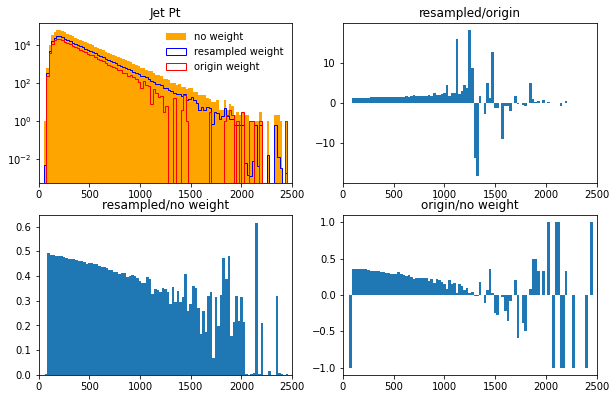

In [27]:
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'Jet Pt')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,0], 
             density=False, bins=np.arange(0,2500,step=25), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,0], histtype='step', 
             density=False, bins=np.arange(0,2500,step=25), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['eval_resampling'][df['label']==1]).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,0], histtype='step', 
             density=False, bins=np.arange(0,2500,step=25), log=True,
             color='red',label='origin weight',
             weights = np.array(df['eval_real'][df['label']==1]).reshape(-1,1)) 


ax2.bar(bins0[1:], ns1/ns2,width=25)
ax3.bar(bins0[1:], ns1/ns0,width=25)
ax4.bar(bins0[1:], ns2/ns0,width=25)
ax1.set_xlim([0,2500])
ax2.set_xlim([0,2500])
ax3.set_xlim([0,2500])
ax4.set_xlim([0,2500])


ax1.legend(loc='best')

plt.show()


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


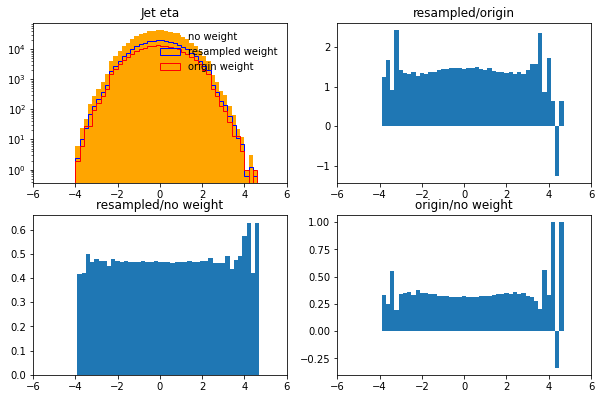

In [13]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'Jet eta')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,1], 
             density=False, bins=np.arange(-6,6,step=0.2), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,1], histtype='step', 
             density=False, bins=np.arange(-6,6,step=0.2), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['eval_resampling'][df['label']==1]).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,1], histtype='step', 
             density=False, bins=np.arange(-6,6,step=0.2), log=True,
             color='red',label='origin weight',
             weights = np.array(df['eval_real'][df['label']==1]).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=0.2)
ax3.bar(bins0[1:], (ns1/ns0),width=0.2)
ax4.bar(bins0[1:], (ns2/ns0),width=0.2)
ax1.set_xlim([-6,6])
ax2.set_xlim([-6,6])
ax3.set_xlim([-6,6])
ax4.set_xlim([-6,6])



ax1.legend(loc='best')

plt.show()

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


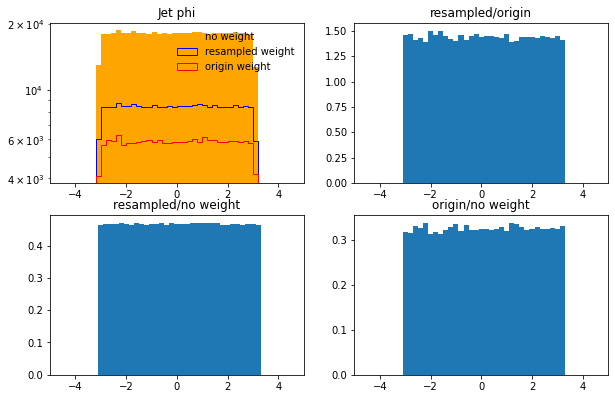

In [14]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'Jet phi')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,2], 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,2], histtype='step', 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['eval_resampling'][df['label']==1]).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,2], histtype='step', 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='red',label='origin weight',
             weights = np.array(df['eval_real'][df['label']==1]).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=0.2)
ax3.bar(bins0[1:], (ns1/ns0),width=0.2)
ax4.bar(bins0[1:], (ns2/ns0),width=0.2)
ax1.set_xlim([-5,5])
ax2.set_xlim([-5,5])
ax3.set_xlim([-5,5])
ax4.set_xlim([-5,5])



ax1.legend(loc='best')

plt.show()

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


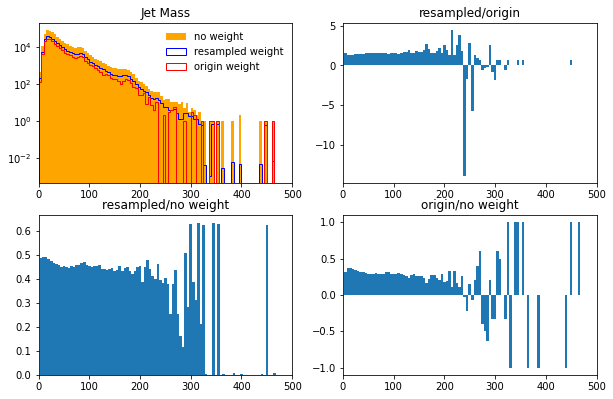

In [15]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'Jet Mass')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,3], 
             density=False, bins=np.arange(0,500,step=5), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,3], histtype='step', 
             density=False, bins=np.arange(0,500,step=5), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['eval_resampling'][df['label']==1]).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_pt_features)[df['label']==1][:,:,3], histtype='step', 
             density=False, bins=np.arange(0,500,step=5), log=True,
             color='red',label='origin weight',
             weights = np.array(df['eval_real'][df['label']==1]).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=5)
ax3.bar(bins0[1:], (ns1/ns0),width=5)
ax4.bar(bins0[1:], (ns2/ns0),width=5)
ax1.set_xlim([0,500])
ax2.set_xlim([0,500])
ax3.set_xlim([0,500])
ax4.set_xlim([0,500])



ax1.legend(loc='best')

plt.show()

In [16]:
np.average(df['eval_resampling'][df['label']==1])

0.4673654286714359

In [17]:
np.average(df['eval_real'][df['label']==1])

0.32451179207219094

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


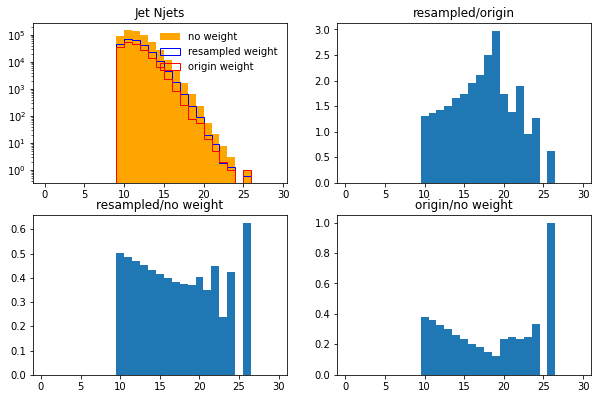

In [18]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'Jet Njets')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(df4[df['label']==1]), 
             density=False, bins=np.arange(30), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(df4[df['label']==1]), histtype='step', 
             density=False, bins=np.arange(30), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['eval_resampling'][df['label']==1]).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(df4[df['label']==1]), histtype='step', 
             density=False, bins=np.arange(30), log=True,
             color='red',label='origin weight',
             weights = np.array(df['eval_real'][df['label']==1]).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=1)
ax3.bar(bins0[1:], (ns1/ns0),width=1)
ax4.bar(bins0[1:], (ns2/ns0),width=1)
# ax1.set_xlim([-1,31])
ax2.set_xlim([-1,31])
ax3.set_xlim([-1,31])
ax4.set_xlim([-1,31])



ax1.legend(loc='best')

plt.show()

In [19]:
df

,prediction,weight,label,real_weight,scale,eval_resampling,eval_real
0,0.703012,2.647875e-12,1.0,-1.004000e-09,2.133786e+09,0.002637,-1.0
1,0.994685,6.361346e-10,1.0,-1.004000e-09,2.133786e+09,0.633600,-1.0
2,0.691917,7.593889e-05,0.0,7.593889e-05,1.408102e+05,1.000000,1.0
3,0.318879,6.205167e-10,1.0,-1.004000e-09,2.133786e+09,0.618044,-1.0
4,0.544665,6.414438e-10,1.0,1.004000e-09,2.133786e+09,0.638888,1.0
...,...,...,...,...,...,...,...
643266,0.978166,6.290068e-10,1.0,-1.004000e-09,2.133786e+09,0.626501,-1.0
643267,0.958416,1.122175e-13,1.0,1.004000e-09,2.133786e+09,0.000112,1.0
643268,0.994995,6.386253e-10,1.0,1.004000e-09,2.133786e+09,0.636081,1.0
643269,0.886942,1.354407e-12,1.0,-1.004000e-09,2.133786e+09,0.001349,-1.0


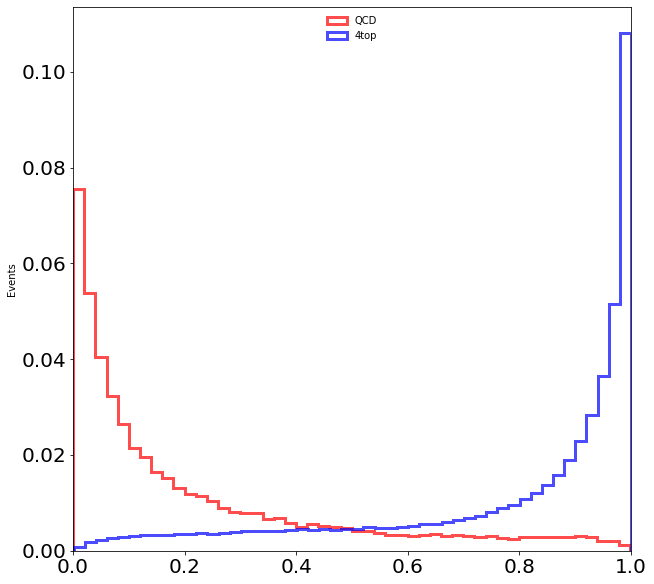

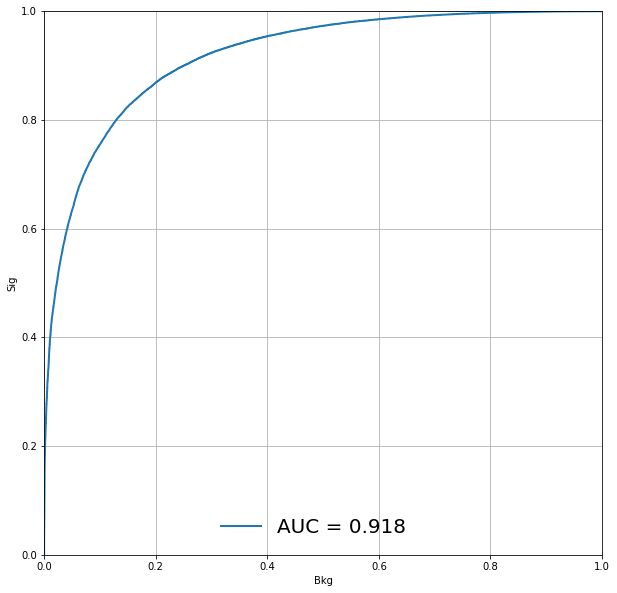

<Figure size 720x720 with 0 Axes>

In [20]:

##### Draw ROC curve #####
from sklearn.metrics import roc_curve, roc_auc_score

df['scaledWeight'] = df['scale']*df['weight']

tpr, fpr, thr = roc_curve(df['label'], df['prediction'], sample_weight=df['scaledWeight'], pos_label=0)
try:
    auc = roc_auc_score(df['label'], df['prediction'], sample_weight=df['scaledWeight'])
except:
    auc = 1

df_bkg = df[df.label==0]
df_sig = df[df.label==1]

plt.hist(df_bkg['prediction']*100, histtype='step', 
         weights=df_bkg['scaledWeight'], density = 'True', 
         bins=50, alpha=0.7, color='red', 
         label='QCD', linewidth=3)
plt.hist(df_sig['prediction']*100, histtype='step', 
         weights=df_sig['scaledWeight'], density = 'True', 
         bins=50, alpha=0.7, color='blue', 
         label='4top', linewidth=3)

plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(0, 100)

#plt.yscale('log')
plt.ylabel('Events')
plt.legend(loc = 'upper center')
# plt.savefig('result/' + output + '/' + output + '_Events.png', dpi=300)
plt.show()
plt.clf()
################################################################
# plt.hist(df_bkg['prediction']*100, histtype='step', weights=df_bkg['scaledWeight'], bins=50, alpha=0.7, color='red', label='Bkg', linewidth=3)
# plt.hist(df_sig['prediction']*100, histtype='step', weights=df_sig['scaledWeight'], bins=50, alpha=0.7, color='blue', label='Sig', linewidth=3)

# plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 20)
# plt.yticks(fontsize = 20)
# plt.xlim(0, 100)


# #plt.yscale('log')
# plt.ylabel('Events')
# plt.legend(loc = 'upper center')
# # plt.savefig('result/' + output + '/' + output + '_Events.png', dpi=300)
# plt.show()
# plt.clf()

################################################################################

# plt.plot(fpr, tpr, '.-', label='AUC = ' + '%s %f' % (auc, lab))
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc) + '   ' , linewidth='2')
 
plt.xlabel('Bkg')
plt.ylabel('Sig')
#plt.xlim(0, 0.001)
plt.xlim(0, 1.000)
plt.ylim(0, 1.000)
plt.legend(loc = 'lower center',fontsize=20)
# plt.savefig('result/' +output + '/' + output + '_efficiency.png', dpi=300)
plt.grid()
plt.show()
plt.clf()



In [21]:
#### 각 batch 안에서 btag sum
## df4 -> batch(njet)
## df5 -> btag
df5 = pd.read_csv(dddddd[0])
df5 = np.array(df5)
a = 0
num_btag = []
for i in range(len(df4)):
    btag = df5[a:a+df4[i][0]]

    sum_btag = btag.sum()
 
    
    num_btag.append(sum_btag)
    a += df4[i][0]

    
#     max_eta_feature = 

NameError: name 'dddddd' is not defined

In [ ]:
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title='NBjet')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(num_btag, 
             density=False, bins=np.arange(0,12), log=True,range=[0,12],
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(num_btag, histtype='step', 
             density=False, bins=np.arange(0,12), log=True, range=[0,12],
             color='blue',label='resampled weight',
             weights = np.array(df['prediction']).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(num_btag, histtype='step', 
             density=False, bins=np.arange(0,12), log=True, range=[0,12],
             color='red',label='origin weight',
             weights = np.array(df['weight']).reshape(-1,1)) 

ax2.bar(bins1[1:], (ns1/ns2),width=1)
ax3.bar(bins1[1:], (ns1/ns0),width=1)
ax4.bar(bins1[1:], (ns2/ns0),width=1)
ax1.set_xlim([0,12])
ax2.set_xlim([0,12])
ax3.set_xlim([0,12])
ax4.set_xlim([0,12])



ax1.legend(loc='best')
plt.show()
